In [189]:
import pandas as pd 
import numpy as np
import scipy
import seaborn as sns
import matplotlib.pyplot as plt
initial_df=pd.read_csv("bank-additional-full.csv",sep=';')
df=initial_df.copy()
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


   Input variables:
  #### bank client data:
   1 - age (numeric)

   2 - job : type of job (categorical: "admin.","blue-collar","entrepreneur","housemaid","management","retired","self-employed","services","student","technician","unemployed","unknown")

   3 - marital : marital status (categorical: "divorced","married","single","unknown"; note: "divorced" means divorced or widowed)
   
   4 - education (categorical: "basic.4y","basic.6y","basic.9y","high.school","illiterate","professional.course","university.degree","unknown")
  
   5 - default: has credit in default? (categorical: "no","yes","unknown")
   
   6 - housing: has housing loan? (categorical: "no","yes","unknown")
   
   7 - loan: has personal loan? (categorical: "no","yes","unknown")
   #### related with the last contact of the current campaign:
   
   8 - contact: contact communication type (categorical: "cellular","telephone") 
  
   9 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
  
  10 - day_of_week: last contact day of the week (categorical: "mon","tue","wed","thu","fri")
  
  11 - duration: last contact duration, in seconds (numeric). Important note:  this attribute highly affects the output target (e.g., if duration=0 then y="no"). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
   # other attributes:
  
  12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
  
  13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
 
  14 - previous: number of contacts performed before this campaign and for this client (numeric)
 
  15 - poutcome: outcome of the previous marketing campaign (categorical: "failure","nonexistent","success")
   #### social and economic context attributes
  
  16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
  
  17 - cons.price.idx: consumer price index - monthly indicator (numeric)     
  
  18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)     
 
  19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
 
  20 - nr.employed: number of employees - quarterly indicator (numeric)

  Output variable (desired target):
 
  21 - y - has the client subscribed a term deposit? (binary: "yes","no")


In [190]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [191]:
df.describe().round(2)

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00,41188.00,41188.00,41188.00,41188.00,41188.00,41188.00,41188.00,41188.00,41188.00
mean,40.02,258.29,2.57,962.48,0.17,0.08,93.58,-40.50,3.62,5167.04
std,10.42,259.28,2.77,186.91,0.49,1.57,0.58,4.63,1.73,72.25
min,17.00,0.00,1.00,0.00,0.00,-3.40,92.20,-50.80,0.63,4963.60
25%,32.00,102.00,1.00,999.00,0.00,-1.80,93.08,-42.70,1.34,5099.10
50%,38.00,180.00,2.00,999.00,0.00,1.10,93.75,-41.80,4.86,5191.00
75%,47.00,319.00,3.00,999.00,0.00,1.40,93.99,-36.40,4.96,5228.10
max,98.00,4918.00,56.00,999.00,7.00,1.40,94.77,-26.90,5.04,5228.10


In [192]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [193]:
df.duplicated().sum()

12

In [194]:
df.drop_duplicates(inplace=True)

### Check for outliers


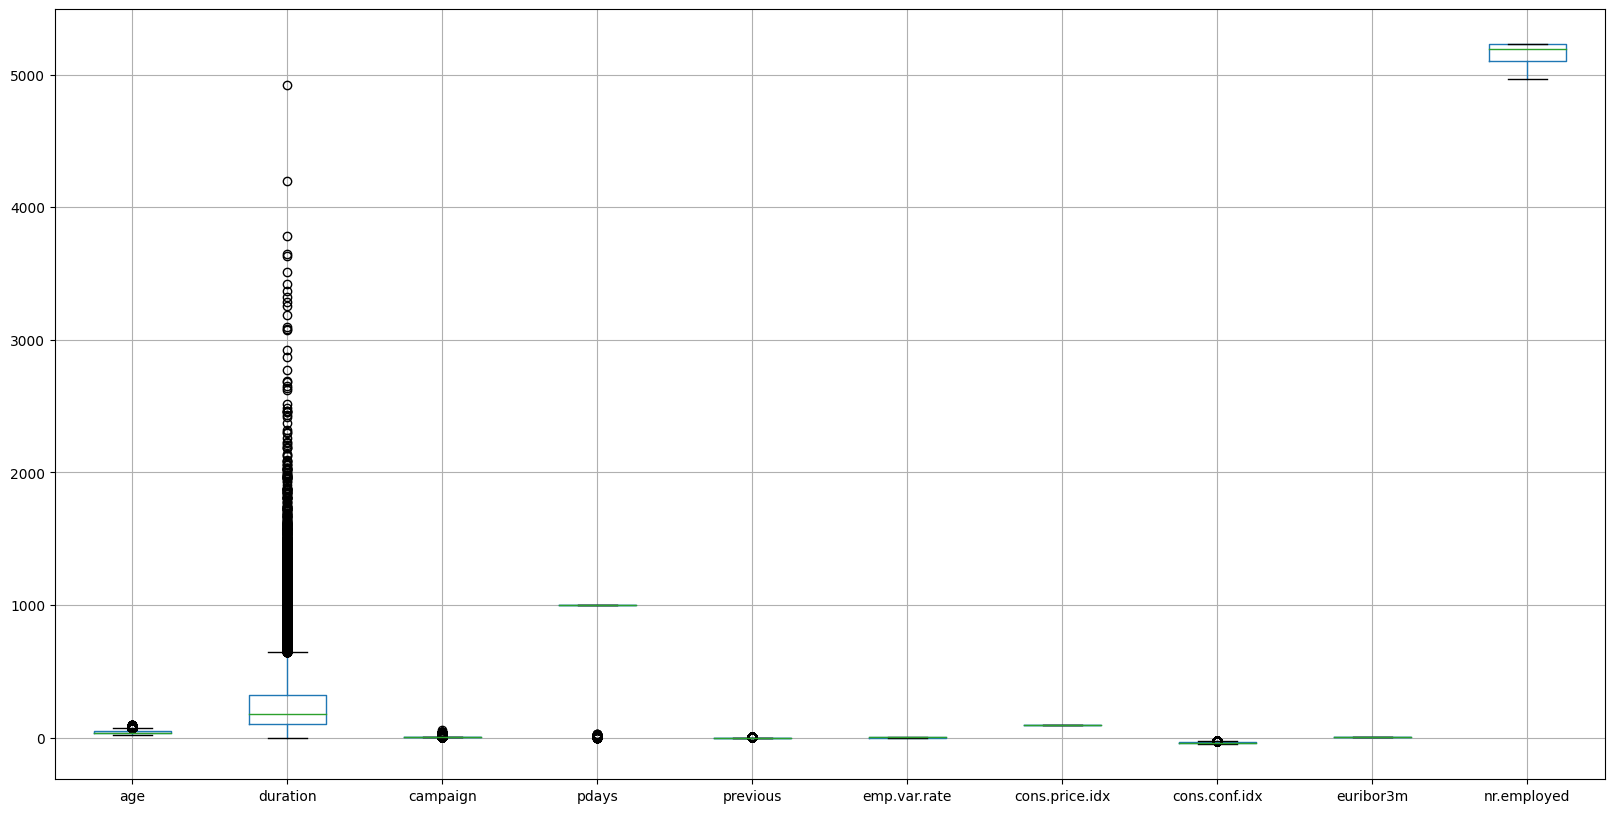

In [195]:
plt.figure(figsize=(20,10))
df.boxplot()
print()

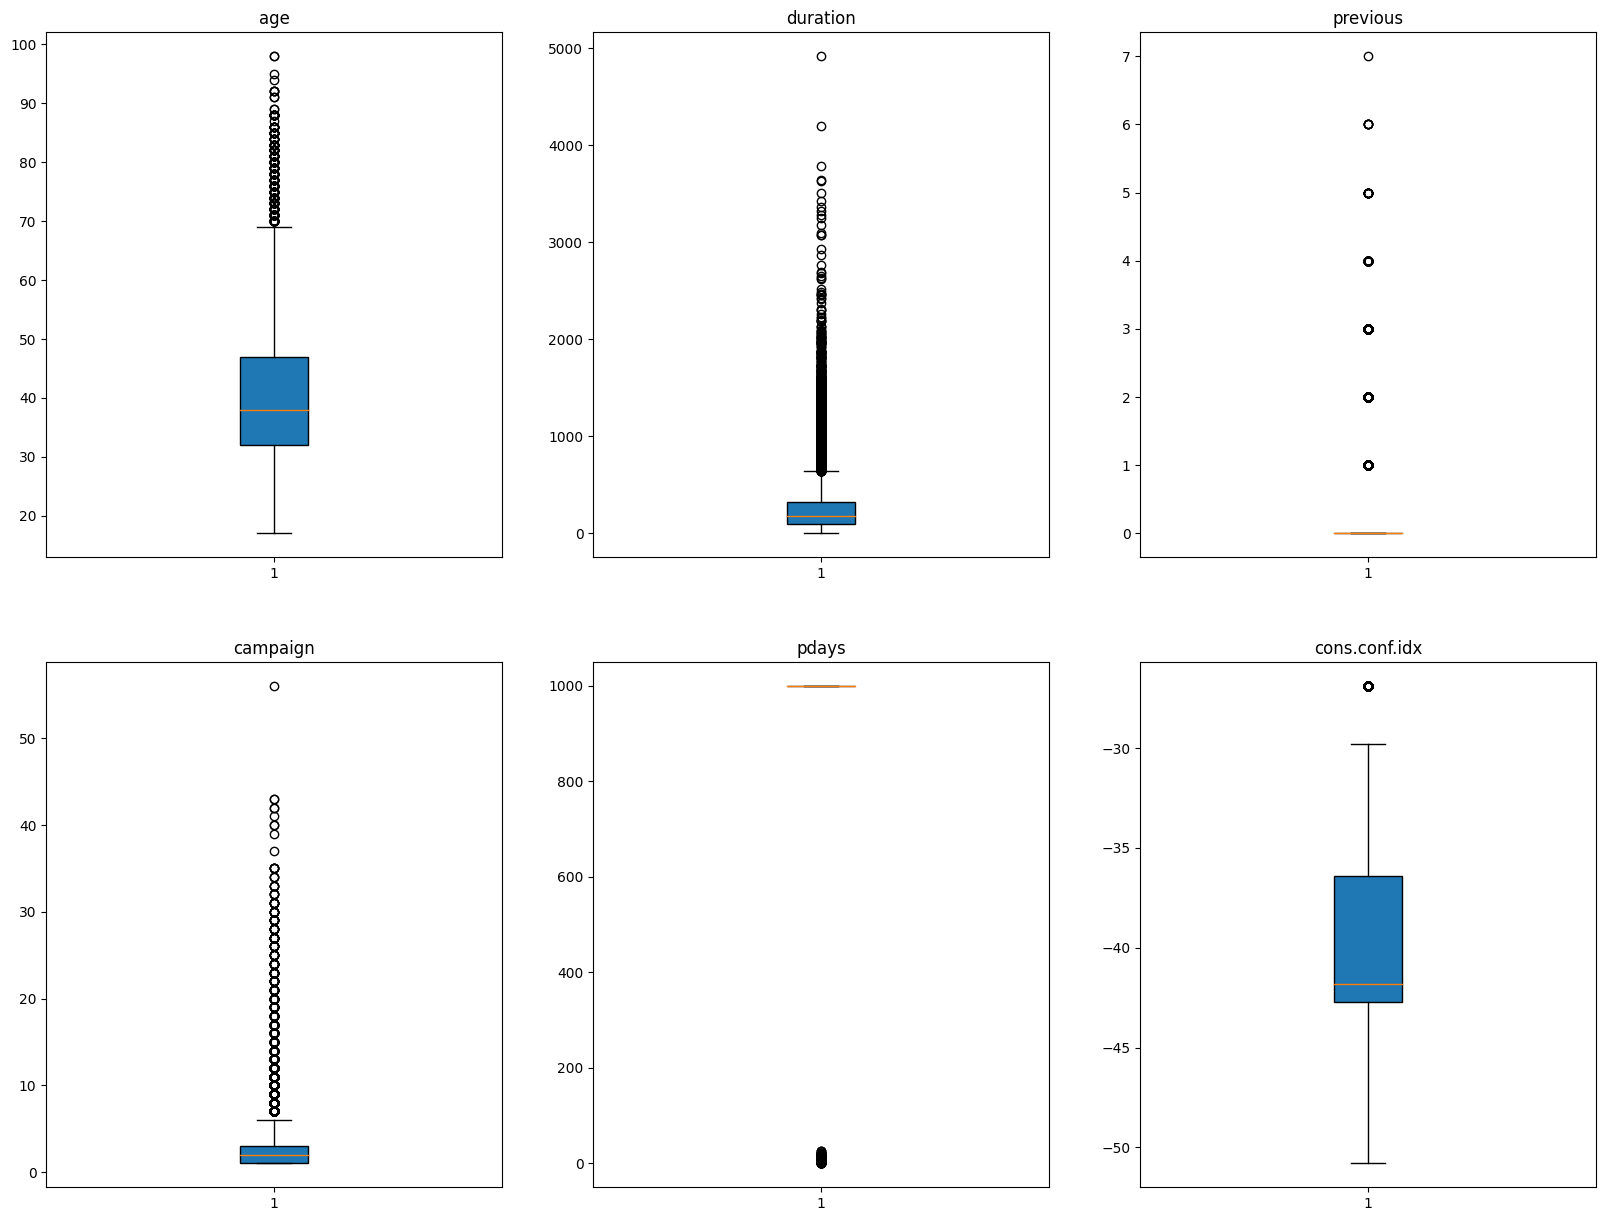

In [196]:
fig = plt.figure(figsize =(20, 15))

outliered_cols=["age","duration","previous","campaign","pdays","cons.conf.idx"]

for i,col in enumerate(df[outliered_cols]):
         plt.subplot(2,3,i+1)
         plt.title(col)
         plt.boxplot(df[col],patch_artist = True)

In [197]:
def remove_outliers(cols,q1_pos=0.25,q3_pos=0.75):
         global df
         for col in cols:
                  col=str(col)
                  Q1 = df[col].quantile(q1_pos)
                  Q3 = df[col].quantile(q3_pos)
                  IQR = Q3 - Q1
                  lower = Q1 - 1.5 * IQR
                  upper = Q3 + 1.5 * IQR
                  df = df[df[col] >= lower]
                  df = df[df[col] <=upper]
remove_outliers(outliered_cols)

In [198]:
X = df.drop(['y'], axis=1)
y = df["y"]

In [199]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
y=le.fit_transform(y)

In [200]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,stratify=y,random_state=42)

### Resampling

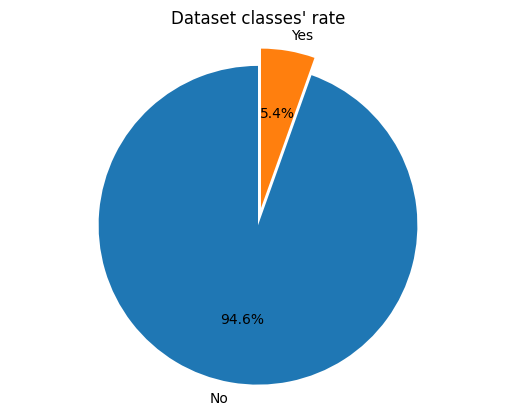

In [201]:
##in training data 
train_data=X_train.copy()
train_data["y"]=y_train

values=train_data["y"].value_counts().tolist()
values=[i * 100/sum(values) for i in values]       #get percentage values
labels=["No","Yes"]
explode = (0.01, 0.1)
fig1, ax1 = plt.subplots()
ax1.pie(values, explode=explode, labels=labels, autopct='%1.1f%%',shadow=False, startangle=90)
ax1.axis('equal')
plt.title('Dataset classes\' rate')
plt.show()

In [202]:
class_majority=train_data[train_data.y==0]
class_minority=train_data[train_data.y==1]

# Upsample of minority class
from sklearn.utils import resample
class_minority_upsampled = resample(class_minority, 
                                           replace = True,     
                                           n_samples =class_majority.shape[0],   
                                           random_state = 42) 
train_data = pd.concat([class_majority, class_minority_upsampled])
X_train=train_data.drop(['y'], axis=1)
y_train=train_data["y"]

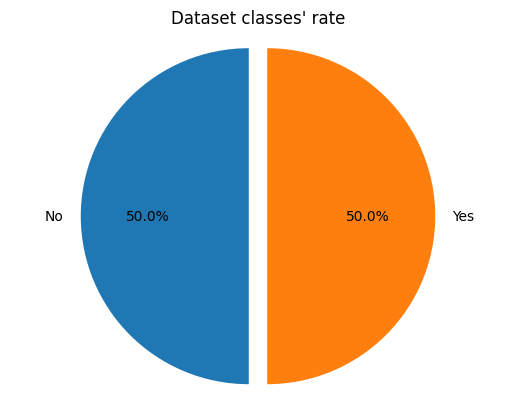

In [203]:
values=train_data["y"].value_counts().tolist()
values=[i * 100/sum(values) for i in values]       #get percentage values
labels=["No","Yes"]
explode = (0.01, 0.1)
fig1, ax1 = plt.subplots()
ax1.pie(values, explode=explode, labels=labels, autopct='%1.1f%%',shadow=False, startangle=90)
ax1.axis('equal')
plt.title('Dataset classes\' rate')
plt.show()

### Encoding and Standardization

In [204]:
from category_encoders import BinaryEncoder,OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder,StandardScaler,MinMaxScaler
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer,make_column_selector
from sklearn.preprocessing import FunctionTransformer
from sklearn.decomposition import PCA

prep=make_column_transformer(
         (StandardScaler(),make_column_selector(dtype_include=np.number)),
         (OneHotEncoder(),make_column_selector(dtype_include=object)),
         remainder='passthrough',
         verbose_feature_names_out=False)
# prep=make_pipeline(prep,remove_outliers(outliered_cols))
# prep=make_pipeline(prep,PCA())

### make copy of data to visualize complete dataset
------------------------------------------------------------------------------------------------------------------------------------------

In [205]:
copied_df=initial_df.copy()

for column in copied_df.columns:
         if copied_df[column].dtype==object:
                 copied_df[column]=copied_df[column].astype('category').cat.codes

In [206]:
corr_matrix=copied_df.corr()
corr_matrix["y"].sort_values(ascending=False)

y                 1.000000
duration          0.405274
previous          0.230181
poutcome          0.129789
education         0.057799
cons.conf.idx     0.054878
marital           0.046203
age               0.030399
job               0.025122
day_of_week       0.015967
housing           0.011552
loan             -0.004909
month            -0.006065
campaign         -0.066357
default          -0.099352
cons.price.idx   -0.136211
contact          -0.144773
emp.var.rate     -0.298334
euribor3m        -0.307771
pdays            -0.324914
nr.employed      -0.354678
Name: y, dtype: float64

### Mutual Information

In [207]:
from sklearn.feature_selection import SelectPercentile
from sklearn.tree import DecisionTreeClassifier 

x_copied=copied_df.drop("y",axis=1)
y_copied=copied_df["y"]
selector = SelectPercentile(percentile=50) 
selector.fit(x_copied,y_copied)
x_copied = selector.transform(x_copied)
X_train_, X_test_, y_train_, y_test_=train_test_split(x_copied,y_copied,test_size=0.2,stratify=y_copied,random_state=42)

model = DecisionTreeClassifier().fit(X_train_,y_train_)
score = model.score(X_test_,y_test_)
print(score)


0.8964554503520272


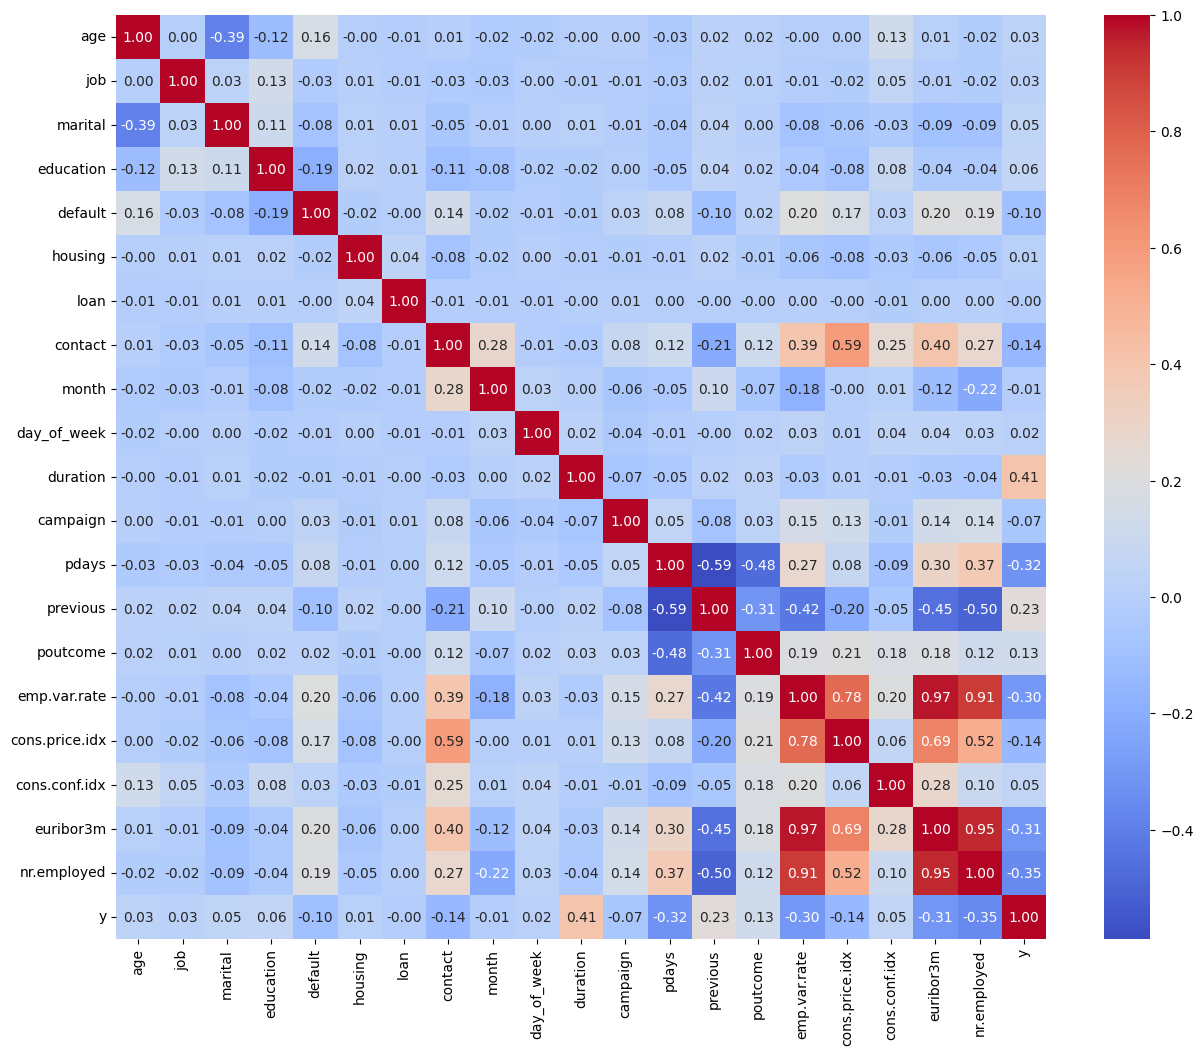

In [208]:
plt.figure(figsize=(15,12))
sns.heatmap(copied_df.corr(numeric_only=True),annot=True,cmap='coolwarm',fmt='.2f')
plt.show()

------------------------------------------------------------------------------------------------------------------------------------------

### Grid Search

In [209]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

full_pipeline = Pipeline([
    ("preprocessing", prep),
    ("LogisticRegression", LogisticRegression(random_state=42,n_jobs=-1)),
])

param_grid = [
    {'LogisticRegression__C': [0.01,0.1,0.5, 1,10],
     'LogisticRegression__max_iter': [100,500,1000, 2000,3000],
     },
]
grid_search = GridSearchCV(full_pipeline, param_grid,refit = True, cv=3,scoring='accuracy',n_jobs=-1)
grid_search.fit(X_train,y_train)
print("Test  score: %.2f" % (grid_search.score(X_test, y_test)*100))

print(grid_search.best_params_) 

print(grid_search.best_estimator_) 

C:\Users\abdoo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_search.py:979: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan]
  warnings.warn(


Test  score: 84.56
{'LogisticRegression__C': 0.01, 'LogisticRegression__max_iter': 100}
Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001EB961AF590>),
                                                 ('onehotencoder',
                                                  OneHotEncoder(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001EB86AEDB50>)],
                                   verbose_feature_names_out=False)),
                ('LogisticRegression',
                 LogisticRegression(C=0.01, n_jobs=-1, random_state=42))])


### Modeling

In [210]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectPercentile

lr=LogisticRegression(random_state=42,max_iter=1000)
model_1=make_pipeline(prep,lr)
model_1.fit(X_train,y_train)
print("Test  score: %.2f" % (model_1.score(X_test, y_test)*100))


Test  score: 85.04


In [211]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(random_state=42)
model_4=make_pipeline(prep,dtc)
model_4.fit(X_train, y_train)
print("Test  score: %.2f" % (model_4.score(X_test, y_test)*100))

Test  score: 93.54


In [212]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=1000,random_state=42,n_jobs=-1)
model_3=make_pipeline(prep,rfc)
model_3.fit(X_train, y_train)
print("Test  score: %.2f" % (model_3.score(X_test, y_test)*100))

Test  score: 94.73


In [213]:

from sklearn.ensemble import GradientBoostingClassifier
gbc= GradientBoostingClassifier(n_estimators=1000,random_state=42,n_iter_no_change=100)
model_2=make_pipeline(prep,gbc)
model_2.fit(X_train, y_train)
print("Test  score: %.2f" % (model_2.score(X_test, y_test)*100))


Test  score: 90.12


In [214]:
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.ensemble import VotingClassifier, VotingRegressor, BaggingClassifier, AdaBoostClassifier 

models = [('LogisticRegression', model_1),
         ('DecisionTreeClassifier', model_4),
         ('RandomForestClassifier',model_3),
         ("GradientBoostingClassifier",model_2)]

ensemble = VotingClassifier(estimators=models)
ensemble.fit(X_train, y_train)

prediction = ensemble.predict(X_test)
score = accuracy_score(y_test, prediction)
print('Ensemble Model Accuracy: {}'.format(round(score*100,1)))

Ensemble Model Accuracy: 94.4
